## Simulation und Modellierung WS 16/17 Uebung 07 : 
### Abgabe zum 11.12.2016

### <u>Aufgabe 1</u> Erste Schritte mit Git (3P)

Ziel dieser Aufgabe ist, die Lösung dieses kompletten Aufgabenblattes bei einem Git-Filehost (github) online zu stellen. An der hochgeladenen Version sollen Sie dann noch mindestens eine Änderung vornehmen.

Nun der Reihenfolge nach: 
* Erstellen Sie einen Account bei Github mit einem `username`

  https://github.com/
 
  Erstellen Sie dort per Mausklick ein neues Repository, z.B. `my_repo`. (unter `new repository`)

* Installieren Sie git auf Ihrem Arbeitsrechner:

  #### Linux:
  
  `yum install git`
  
  `apt-get install git`
  
  `zypper in git`

  #### Mac:
  
  `brew install git`
  
  https://git-scm.com/download/mac
  
  #### Windows:
  
  http://git-for-windows.github.io//

  Setzen Sie dann eventuell Namen und Adresse.
  
  `git config --global user.name "Your Name"`
  
  `git config --global user.email you@example.com`


* Initialisieren Sie git in einem neuen Ordner. Fügen Sie `my_repo.git` als origin hinzu. Speichern Sie dieses notebook im neuen Ordner. Führen Sie `git add .`, `git commit -m "  "` und `git push origin master` aus. Das alles geht im Terminal folgendermaßen:

  ```bash
      mkdir neuer_ordner
      cd neuer_ordner
      git init
      git remote add origin https://username@bitbucket.org/username/my_repo.git
      cp /path/to/notebook/my_notebook.ipynb my_notebook.ipynb
      git add .
      git commit -m "Dieses notebook ist die Hausaufgabe Blatt 7, zunaechst unausgefuellt."
      git push origin master  
  ```
  
  Sehen Sie nach, ob Ihr notebook online ist.

* Spielen Sie mit `git status`, `git log`, `git branch -av` .. herum und klicken Sie im Webfilehost herum, bis Sie sich ein wenig auskennen. Schreiben Sie Fragen für die Übung auf.

* Nehmen Sie nun lokal auf Ihrem Rechner Änderungen am notebook vor, zum Beispiel indem Sie die Hausaufgaben lösen. Ändern Sie dies wie oben online: `git add .`, `git commit -m "  "`, `git push origin master`. Achten Sie auf sinnvolle commit-Kommentare.
  
  ```bash
      git add .
      git commit -m "Aufg. 1 geloest, es gibt noch ein Problem mit dem Vorzeichen von h."
      git push origin master  
  ```

Senden Sie den https-Repository-Pfad an frpeter (at) uni-potsdam.de.

### <u>Aufgabe 2</u> Das Lineare Least Squares Problem (7P)

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung mit den von Ihnen gefundenen Koeffizienten erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen die Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder den Wertebereich von $x$ explizit berechnen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

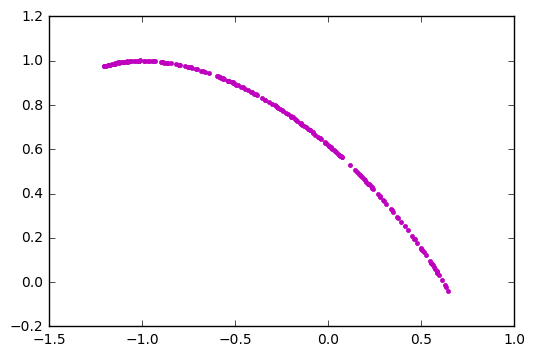

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# exportieren der Daten aus der Textdatei
data = np.genfromtxt("orbit.dat.txt")

# zuweisung von x und y
x = data[:,0]
y = data[:,1]

plt.plot(x,y, 'm.')
plt.show()

In [2]:
# matrix fuer x**2 , x*y , y**2, x und y aus "data"
mtx = np.zeros((200,5)) # erstellt eine 200x5 Matrix mit dem inhalt null

# zuweisen der zeilen und spalten
mtx[:,0] = x**2
mtx[:,1] = x*y
mtx[:,2] = y**2
mtx[:,3] = x
mtx[:,4] = y

# rechte seite des GLS besteht aus einem spaltenvektor mit zweihundert 1en
b = np.ones((200,1))

# groeße der arrays
#print(np.shape(mtx))
#print(np.shape(b))

# print(mtx)

# berechnen der Parameter c aus A.T*A*c = A.T*b
c = np.linalg.solve(mtx.T.dot(mtx),mtx.T.dot(b))
print(c)
#print(np.shape(c))

# die zeilen aus c sind die Parameter A,B,C,D,E
A = c[0]
B = c[1]
C = c[2]
D = c[3]
E = c[4]

[[ 0.9827333 ]
 [ 0.95673125]
 [ 0.95861779]
 [ 1.00987493]
 [ 1.02591762]]


In [3]:
# Kegelschnitt 

if B**2 - 4*A*C < 0:
    print("Der Kegelschnitt ist eine geschlossene Kurve")
else:
    if Kegelschnitt == 0:
        print("Der Kegelschnitt ist eine offene Kurve")
    else: 
        print("Der Kegelschnitt ist eine Hyperbel")

Der Kegelschnitt ist eine geschlossene Kurve


In [9]:
# y aus y**2 + py + q = 0 bestimmt

xplot = np.linspace(-3,3,1000)
p = (E + B*xplot)/ C
q = (A*xplot**2 + D*xplot - 1)/C

y2 = -p/2 + np.sqrt((p/2)**2 -q) # was soll der arme PC bei +- denken?
y1 = -p/2 - np.sqrt((p/2)**2 -q)
#print(y12)
# die nan's duerften durch die negativen werten unter der wurzel entstehen, weshalb der plot unvollständig ist

/home/guest/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
/home/guest/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


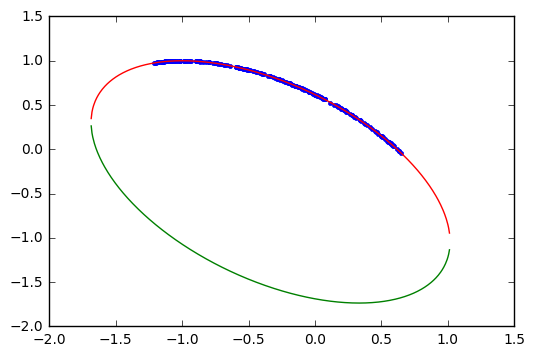

In [10]:
# plotten der Kurven
plt.plot(x,y, '.') # plot aus dem datensatz
plt.plot(xplot,y1)
plt.plot(xplot, y2)
#plt.axis('equal')
plt.show()

Imaginaere Werte in plot nicht ausgeschlossen; nur unteren Ast der Kurve geplottet.
sonst gut.
-1 Punkt

### <u>Zusatzaufgabe</u> (2P)

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Containern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert. *Hinweis* : wandeln Sie `x` und `y` in `numpy` arrays um.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen.
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.